Dataset from here: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Credit card default I.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Data Exploration and Cleaning

In [3]:
df.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [4]:
df = df.drop(columns="ID")

No NA values to fill, but imputing methods such as missforest or something could be used where relevant

Since there are so few variables avaiable, we should not drop any of them 
The only independent variables are credit limit, sex, education, marriage, age, how long payment was made / not made in previous months, how much needed to be paid in previous months, and how much was paid in previous months

Dependent variables are whether default payment was made next month or not

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603700,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489136,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#Rename Columns
df = df.rename(columns={
    'LIMIT_BAL': 'Credit_Amount', 
    'SEX': 'Sex',
    "EDUCATION": "Education",
    "MARRIAGE": "Marital_Status",
    "AGE": "Age",
    "PAY_0": "Repay_Status_September", #Assume as typo, meant PAY_1 referring to september
    "PAY_2": "Repay_Status_August",
    "PAY_3": "Repay_Status_July",
    "PAY_4": "Repay_Status_June",
    "PAY_5": "Repay_Status_May",
    "PAY_6": "Repay_Status_April",
    "BILL_AMT1": "Billed_Amount_September",
    "BILL_AMT2": "Billed_Amount_August",
    "BILL_AMT3": "Billed_Amount_July",
    "BILL_AMT4": "Billed_Amount_June",
    "BILL_AMT5": "Billed_Amount_May",
    "BILL_AMT6": "Billed_Amount_April",
    "PAY_AMT1": "Paid_Amount_September",
    "PAY_AMT2": "Paid_Amount_August",
    "PAY_AMT3": "Paid_Amount_July",
    "PAY_AMT4": "Paid_Amount_June",
    "PAY_AMT5": "Paid_Amount_May",
    "PAY_AMT6": "Paid_Amount_April",
    "default payment next month": "Defaulted?"
})

Female    18111
Male      11889
Name: Sex, dtype: int64

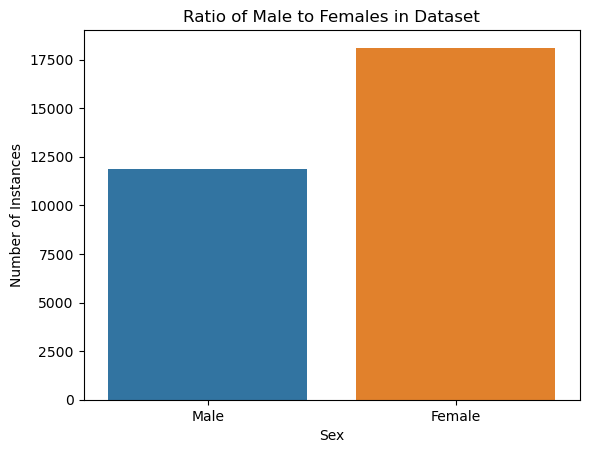

In [7]:
df = df.replace({"Sex":{2:"Female",1:"Male"}})
sns.countplot(data=df,x="Sex")
plt.title("Ratio of Male to Females in Dataset")
plt.ylabel("Number of Instances")
df["Sex"].value_counts()

In [8]:
#Replace Sex with dummy variables
def one_hot_encoding(column):
    global df
    dummy = pd.get_dummies(df[f"{column}"])
    df=df.merge(dummy, left_index=True, right_index=True)
    df=df.drop(columns = f"{column}")
    
one_hot_encoding("Sex")

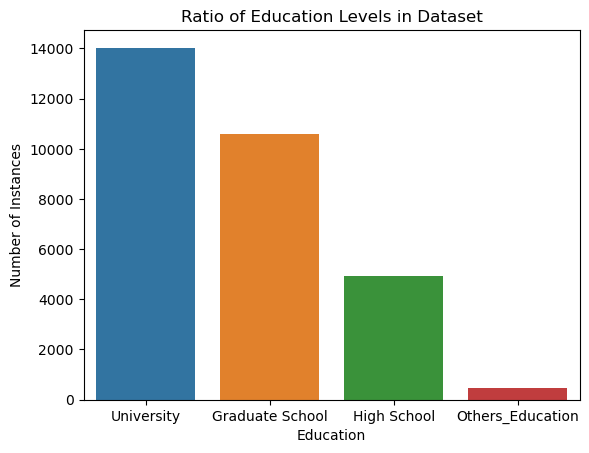

In [9]:
"""
Note that 0, 5 and 6 are not included in the data description, can consider removing
Since 4 encapsules others, we can assume that 0, 5 and 6 are invalid inputs
We can replace every value in 0, 5,6 to 4 since 4 is others
"""

df["Education"] = df["Education"].replace([0,5,6], 4)
df = df.replace({"Education":{1:"Graduate School",2:"University",3:"High School",4:"Others_Education"}})
sns.countplot(data=df,x="Education")
plt.title("Ratio of Education Levels in Dataset")
plt.ylabel("Number of Instances")

df["Education"].value_counts()
one_hot_encoding("Education")

Text(-3.9305555555555554, 0.5, 'Number of Instances')

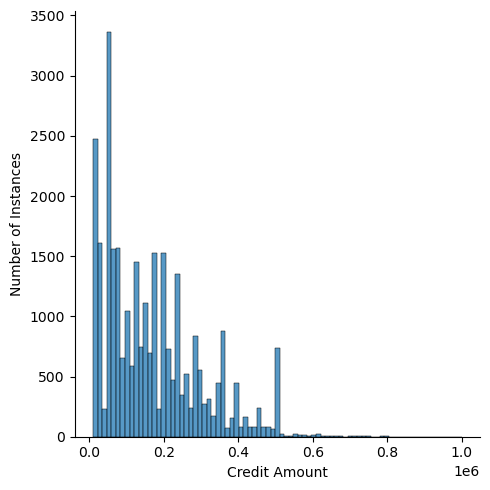

In [10]:
sns.displot(df, x="Credit_Amount")
plt.xlabel("Credit Amount")
plt.ylabel("Number of Instances")

Text(0.5, 1.0, 'Credit Amount (Standardised) against whether Customer has Defaulted')

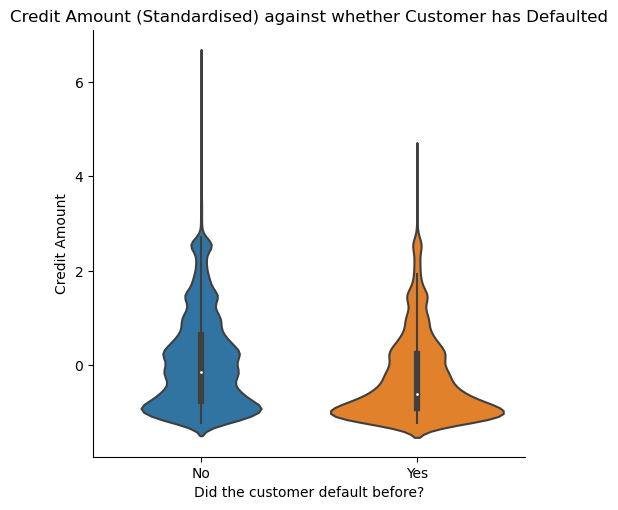

In [11]:
#Credit Amount - Normalise
from scipy import stats
df["Credit_Amount"] = stats.zscore(df["Credit_Amount"])
"""
Normal Standardisation used here. 
For future consideration, we can also consider power transformation, log transformation, standard scaler, etc.
"""

sns.catplot(data=df,x="Defaulted?",y="Credit_Amount", kind = "violin")
plt.ylabel("Credit Amount")
plt.xlabel("Did the customer default before?")
plt.xticks([0,1],["No","Yes"])
plt.title("Credit Amount (Standardised) against whether Customer has Defaulted")

Text(0.5, 1.0, 'Credit Amount (Standardised) against whether Customer has Defaulted, using a Catplot')

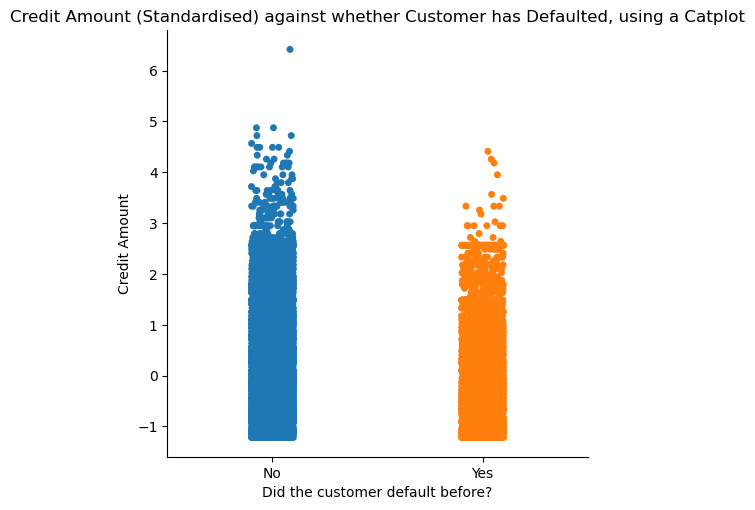

In [12]:
sns.catplot(data=df,x="Defaulted?",y="Credit_Amount")
plt.ylabel("Credit Amount")
plt.xlabel("Did the customer default before?")
plt.xticks([0,1],["No","Yes"])
plt.title("Credit Amount (Standardised) against whether Customer has Defaulted, using a Catplot")

In [13]:
#Remove the clear outlier value
df = df[df.Credit_Amount < 5]

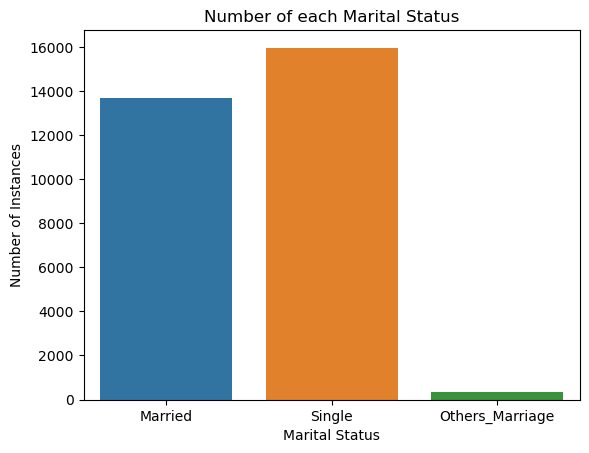

In [14]:
#Marriage
df = df[df.Marital_Status != 0]
"""
Value 0 not found in data dictionary, found earlier and removed
"""
df = df.replace({"Marital_Status":{1:"Married",2:"Single",3:"Others_Marriage"}})
sns.countplot(data=df,x="Marital_Status")
plt.title("Number of each Marital Status")
plt.ylabel("Number of Instances")
plt.xlabel("Marital Status")
df["Marital_Status"].value_counts()
one_hot_encoding("Marital_Status")

Text(0.5, 1.0, 'Spread of Ages of Customers')

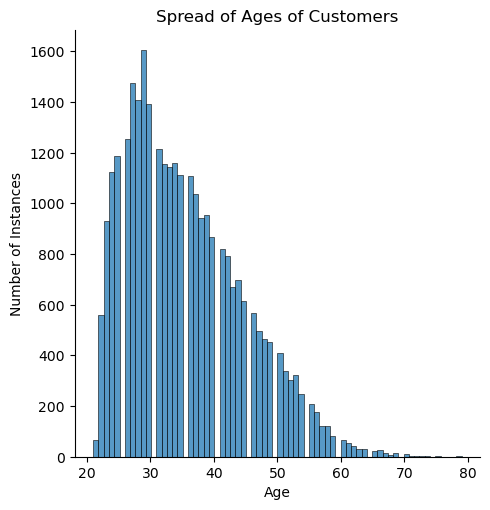

In [15]:
sns.displot(df, x="Age") #Looks normal... no need change
plt.ylabel("Number of Instances")
plt.title("Spread of Ages of Customers")

In [16]:
df["Repay_Status_September"].value_counts()
"""
We notice that there is a significant amount of 0 and -2 values, so it can't be an abnormaly
We will make the following assumptions about what these values mean:
-2 will be interpreted as using autopay
-1 will be interpreted as paying quickly enough, and qualifying for early payment discount
0 will be interpreted as paying quickly enough, but not qualifying for early payment discount
"""
df = df.replace({"Repay_Status_September":{
    -2:"Autopay_September",
    -1:"Duly_Paid_Discount_September",
    0:"Duly_Paid_No_Discount_September",
    1:"1_Month_Late_September",
    2:"2_Month_Late_September",
    3:"3_Month_Late_September",
    4:"4_Month_Late_September",
    5:"5_Month_Late_September",
    6:"6_Month_Late_September",
    7:"7_Month_Late_September",
    8:"8_Month_Late_September"
}})
one_hot_encoding("Repay_Status_September")

Considered making a function to rename all columns, should be and a for loop through the columns, but omitted for now.

In [17]:
df = df.replace({"Repay_Status_August":{
    -2:"Autopay_August",
    -1:"Duly_Paid_Discount_August",
    0:"Duly_Paid_No_Discount_August",
    1:"1_Month_Late_August",
    2:"2_Month_Late_August",
    3:"3_Month_Late_August",
    4:"4_Month_Late_August",
    5:"5_Month_Late_August",
    6:"6_Month_Late_August",
    7:"7_Month_Late_August",
    8:"8_Month_Late_August"
}})
one_hot_encoding("Repay_Status_August")

In [18]:
df = df.replace({"Repay_Status_July":{
    -2:"Autopay_July",
    -1:"Duly_Paid_Discount_July",
    0:"Duly_Paid_No_Discount_July",
    1:"1_Month_Late_July",
    2:"2_Month_Late_July",
    3:"3_Month_Late_July",
    4:"4_Month_Late_July",
    5:"5_Month_Late_July",
    6:"6_Month_Late_July",
    7:"7_Month_Late_July",
    8:"8_Month_Late_July"
}})
one_hot_encoding("Repay_Status_July")

In [19]:
df = df.replace({"Repay_Status_June":{
    -2:"Autopay_June",
    -1:"Duly_Paid_Discount_June",
    0:"Duly_Paid_No_Discount_June",
    1:"1_Month_Late_June",
    2:"2_Month_Late_June",
    3:"3_Month_Late_June",
    4:"4_Month_Late_June",
    5:"5_Month_Late_June",
    6:"6_Month_Late_June",
    7:"7_Month_Late_June",
    8:"8_Month_Late_June"
}})
one_hot_encoding("Repay_Status_June")

In [20]:
df = df.replace({"Repay_Status_May":{
    -2:"Autopay_May",
    -1:"Duly_Paid_Discount_May",
    0:"Duly_Paid_No_Discount_May",
    1:"1_Month_Late_May",
    2:"2_Month_Late_May",
    3:"3_Month_Late_May",
    4:"4_Month_Late_May",
    4:"1_Month_Late_May",
    5:"5_Month_Late_May",
    6:"6_Month_Late_May",
    7:"7_Month_Late_May",
    8:"8_Month_Late_May"
}})
one_hot_encoding("Repay_Status_May")

In [21]:
df = df.replace({"Repay_Status_April":{
    -2:"Autopay_April",
    -1:"Duly_Paid_Discount_April",
    0:"Duly_Paid_No_Discount_April",
    1:"1_Month_Late_April",
    2:"2_Month_Late_April",
    3:"3_Month_Late_April",
    4:"4_Month_Late_April",
    5:"5_Month_Late_April",
    6:"6_Month_Late_April",
    7:"7_Month_Late_April",
    8:"8_Month_Late_April"
}})
one_hot_encoding("Repay_Status_April")

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe()

,Credit_Amount,Age,Billed_Amount_September,Billed_Amount_August,Billed_Amount_July,Billed_Amount_June,Billed_Amount_May,Billed_Amount_April,Paid_Amount_September,Paid_Amount_August,Paid_Amount_July,Paid_Amount_June,Paid_Amount_May,Paid_Amount_April,Defaulted?,Female,Male,Graduate School,High School,Others_Education,University,Married,Others_Marriage,Single,1_Month_Late_September,2_Month_Late_September,3_Month_Late_September,4_Month_Late_September,5_Month_Late_September,6_Month_Late_September,7_Month_Late_September,8_Month_Late_September,Autopay_September,Duly_Paid_Discount_September,Duly_Paid_No_Discount_September,1_Month_Late_August,2_Month_Late_August,3_Month_Late_August,4_Month_Late_August,5_Month_Late_August,6_Month_Late_August,7_Month_Late_August,8_Month_Late_August,Autopay_August,Duly_Paid_Discount_August,Duly_Paid_No_Discount_August,1_Month_Late_July,2_Month_Late_July,3_Month_Late_July,4_Month_Late_July,5_Month_Late_July,6_Month_Late_July,7_Month_Late_July,8_Month_Late_July,Autopay_July,Duly_Paid_Discount_July,Duly_Paid_No_Discount_July,1_Month_Late_June,2_Month_Late_June,3_Month_Late_June,4_Month_Late_June,5_Month_Late_June,6_Month_Late_June,7_Month_Late_June,8_Month_Late_June,Autopay_June,Duly_Paid_Discount_June,Duly_Paid_No_Discount_June,1_Month_Late_May,2_Month_Late_May,3_Month_Late_May,5_Month_Late_May,6_Month_Late_May,7_Month_Late_May,8_Month_Late_May,Autopay_May,Duly_Paid_Discount_May,Duly_Paid_No_Discount_May,2_Month_Late_April,3_Month_Late_April,4_Month_Late_April,5_Month_Late_April,6_Month_Late_April,7_Month_Late_April,8_Month_Late_April,Autopay_April,Duly_Paid_Discount_April,Duly_Paid_No_Discount_April
count,29945.000000,29945.000000,29945.000000,29945.000000,2.994500e+04,29945.000000,29945.000000,29945.000000,29945.000000,2.994500e+04,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000
mean,0.000266,35.480915,51248.414861,49193.328636,4.704692e+04,43278.360094,40322.525330,38880.718484,5658.229922,5.925328e+03,5198.093037,4828.106128,4802.701787,5219.367106,0.221439,0.603440,0.396560,0.353314,0.162732,0.015629,0.468325,0.456103,0.010786,0.533111,0.122925,0.088930,0.010753,0.002538,0.000835,0.000367,0.000301,0.000634,0.091902,0.189381,0.491434,0.000935,0.130873,0.010887,0.003273,0.000835,0.000401,0.000668,0.000033,0.126031,0.201536,0.524528,0.000134,0.127233,0.007948,0.002538,0.000701,0.000768,0.000902,0.000100,0.136049,0.197863,0.525764,0.000067,0.105193,0.006011,0.002304,0.001169,0.000167,0.001937,0.000067,0.144799,0.189414,0.548873,0.002805,0.087527,0.005911,0.000568,0.000134,0.001937,0.000033,0.151411,0.184605,0.565069,0.092169,0.006111,0.001636,0.000434,0.000634,0.001536,0.000067,0.163066,0.191217,0.543129
std,0.999810,9.218326,73494.858075,71015.350177,6.933705e+04,64189.042973,60620.845922,59354.094181,16550.864400,2.305916e+04,16849.856176,15675.876671,15288.679962,17789.807196,0.415222,0.489191,0.489191,0.478007,0.369127,0.124036,0.499004,0.498078,0.103298,0.498911,0.328357,0.284647,0.103140,0.050315,0.028882,0.019163,0.017334,0.025182,0.288892,0.391817,0.4

In [23]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Text(0.5, 9.444444444444438, 'Billed Amount in September')

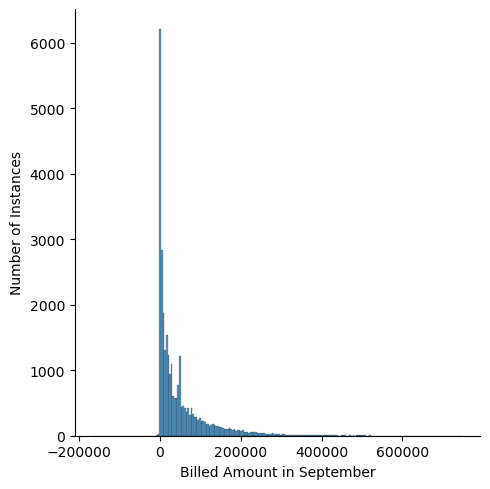

In [24]:
sns.displot(df, x="Billed_Amount_September")
plt.ylabel("Number of Instances")
plt.xlabel("Billed Amount in September")

Note that billed amount can be negative and it's not a problem,
it just means that the bank owes you money
Decide not to take out any too significant outlier values, too high of a billed amount might lead to higher default chance


In [25]:
#Normalise all billed amounts and paid amounts
df["Billed_Amount_September"] = stats.zscore(df["Billed_Amount_September"])
df["Billed_Amount_August"] = stats.zscore(df["Billed_Amount_August"])
df["Billed_Amount_July"] = stats.zscore(df["Billed_Amount_July"])
df["Billed_Amount_June"] = stats.zscore(df["Billed_Amount_June"])
df["Billed_Amount_May"] = stats.zscore(df["Billed_Amount_May"])
df["Billed_Amount_April"] = stats.zscore(df["Billed_Amount_April"])

In [26]:
df["Paid_Amount_September"] = stats.zscore(df["Paid_Amount_September"])
df["Paid_Amount_August"] = stats.zscore(df["Paid_Amount_August"])
df["Paid_Amount_July"] = stats.zscore(df["Paid_Amount_July"])
df["Paid_Amount_June"] = stats.zscore(df["Paid_Amount_June"])
df["Paid_Amount_May"] = stats.zscore(df["Paid_Amount_May"])
df["Paid_Amount_April"] = stats.zscore(df["Paid_Amount_April"])

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe()

,Credit_Amount,Age,Billed_Amount_September,Billed_Amount_August,Billed_Amount_July,Billed_Amount_June,Billed_Amount_May,Billed_Amount_April,Paid_Amount_September,Paid_Amount_August,Paid_Amount_July,Paid_Amount_June,Paid_Amount_May,Paid_Amount_April,Defaulted?,Female,Male,Graduate School,High School,Others_Education,University,Married,Others_Marriage,Single,1_Month_Late_September,2_Month_Late_September,3_Month_Late_September,4_Month_Late_September,5_Month_Late_September,6_Month_Late_September,7_Month_Late_September,8_Month_Late_September,Autopay_September,Duly_Paid_Discount_September,Duly_Paid_No_Discount_September,1_Month_Late_August,2_Month_Late_August,3_Month_Late_August,4_Month_Late_August,5_Month_Late_August,6_Month_Late_August,7_Month_Late_August,8_Month_Late_August,Autopay_August,Duly_Paid_Discount_August,Duly_Paid_No_Discount_August,1_Month_Late_July,2_Month_Late_July,3_Month_Late_July,4_Month_Late_July,5_Month_Late_July,6_Month_Late_July,7_Month_Late_July,8_Month_Late_July,Autopay_July,Duly_Paid_Discount_July,Duly_Paid_No_Discount_July,1_Month_Late_June,2_Month_Late_June,3_Month_Late_June,4_Month_Late_June,5_Month_Late_June,6_Month_Late_June,7_Month_Late_June,8_Month_Late_June,Autopay_June,Duly_Paid_Discount_June,Duly_Paid_No_Discount_June,1_Month_Late_May,2_Month_Late_May,3_Month_Late_May,5_Month_Late_May,6_Month_Late_May,7_Month_Late_May,8_Month_Late_May,Autopay_May,Duly_Paid_Discount_May,Duly_Paid_No_Discount_May,2_Month_Late_April,3_Month_Late_April,4_Month_Late_April,5_Month_Late_April,6_Month_Late_April,7_Month_Late_April,8_Month_Late_April,Autopay_April,Duly_Paid_Discount_April,Duly_Paid_No_Discount_April
count,29945.000000,29945.000000,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,2.994500e+04,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000
mean,0.000266,35.480915,3.511771e-16,4.695131e-16,6.653995e-16,1.240961e-15,-7.818526e-16,8.898190e-16,8.959921e-17,3.909370e-16,1.972563e-15,5.604124e-16,-4.715055e-16,2.987703e-16,0.221439,0.603440,0.396560,0.353314,0.162732,0.015629,0.468325,0.456103,0.010786,0.533111,0.122925,0.088930,0.010753,0.002538,0.000835,0.000367,0.000301,0.000634,0.091902,0.189381,0.491434,0.000935,0.130873,0.010887,0.003273,0.000835,0.000401,0.000668,0.000033,0.126031,0.201536,0.524528,0.000134,0.127233,0.007948,0.002538,0.000701,0.000768,0.000902,0.000100,0.136049,0.197863,0.525764,0.000067,0.105193,0.006011,0.002304,0.001169,0.000167,0.001937,0.000067,0.144799,0.189414,0.548873,0.002805,0.087527,0.005911,0.000568,0.000134,0.001937,0.000033,0.151411,0.184605,0.565069,0.092169,0.006111,0.001636,0.000434,0.000634,0.001536,0.000067,0.163066,0.191217,0.543129
std,0.999810,9.218326,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415222,0.489191,0.489191,0.478007,0.369127,0.124036,0.499004,0.498078,0.103298,0.498911,0.328357,0.284647,0.103140,0.050315,0.028882,0.019163,0.017334,0.025182,0.288892,0.391

In [28]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# Machine Learning Models

In [29]:
X = df.drop(columns="Defaulted?")
Y = df["Defaulted?"]

In [30]:
from sklearn.model_selection import train_test_split
from numpy.random import seed
seed(420)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model, tree, ensemble

## Logistic Regression

In [32]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
accuracy_table = []

def train_model_and_plot(model_name,model):
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    cm = confusion_matrix(Y_test,pred)
    print(cm)
    accuracy = round((cm[0,0]+cm[1,1])/(sum(sum(cm))),4)
    print(f"Accuracy of {model_name} is {accuracy}")
    
    plt.figure()
    RocCurveDisplay.from_estimator(model, X_test, Y_test)
    plt.title(f"ROC Curve for {model_name}")
    plt.figure()
    PrecisionRecallDisplay.from_estimator(model, X_test, Y_test)
    plt.title(f"Precision-Recall Score for {model_name}")
    accuracy_table.append([model_name,accuracy])

[[5535  295]
 [1081  576]]
Accuracy of Logistic Regression is 0.8162


<Figure size 640x480 with 0 Axes>

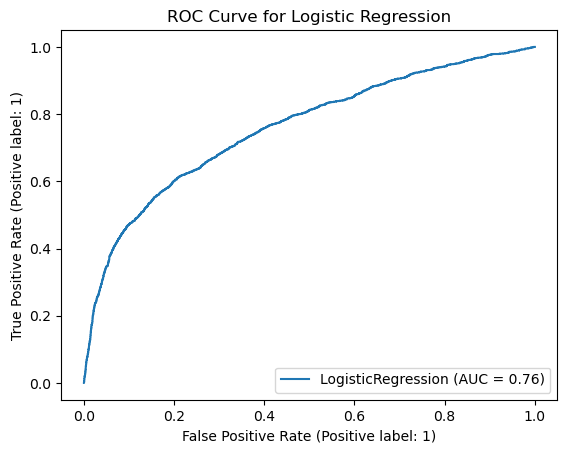

<Figure size 640x480 with 0 Axes>

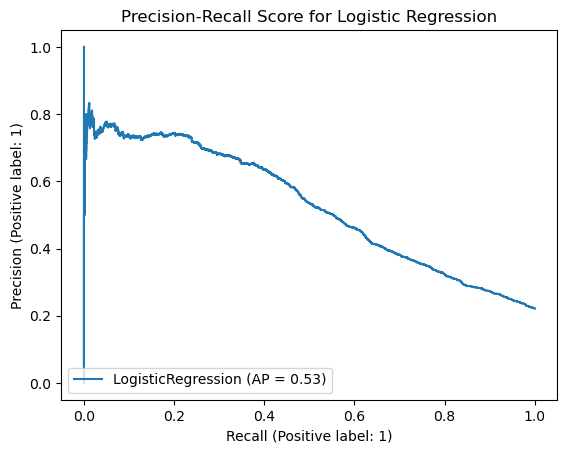

In [33]:
train_model_and_plot("Logistic Regression",linear_model.LogisticRegression(max_iter=1000))

## Decision Tree / CART

[[4762 1068]
 [ 996  661]]
Accuracy of Decision Tree is 0.7243


<Figure size 640x480 with 0 Axes>

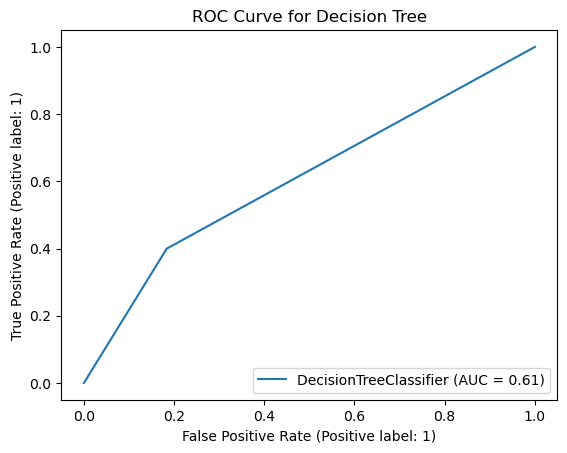

<Figure size 640x480 with 0 Axes>

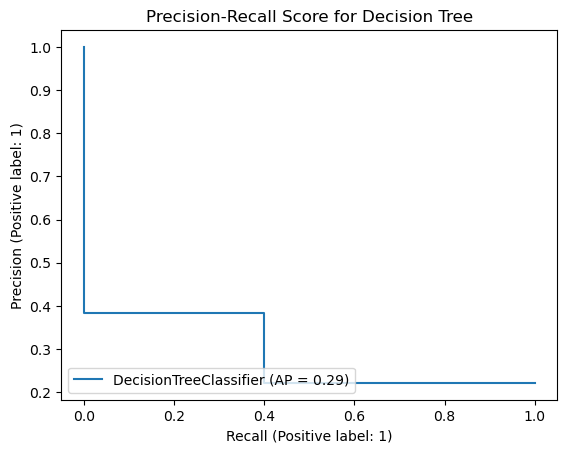

In [34]:
train_model_and_plot("Decision Tree",tree.DecisionTreeClassifier())

## Random Forest

[[5477  353]
 [1080  577]]
Accuracy of Random Forest is 0.8086


<Figure size 640x480 with 0 Axes>

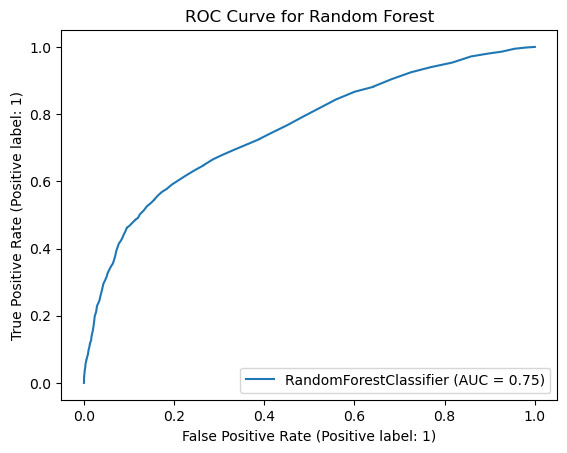

<Figure size 640x480 with 0 Axes>

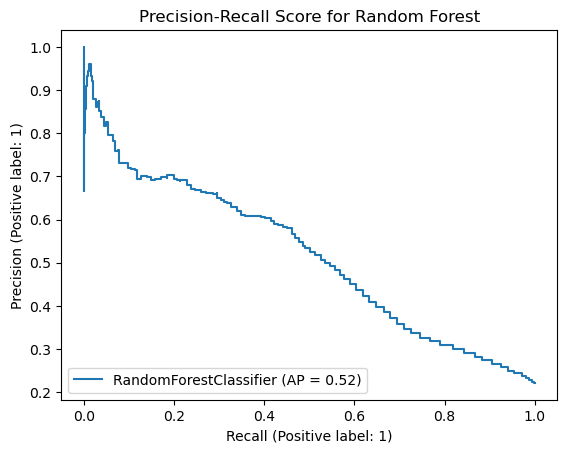

In [35]:
train_model_and_plot("Random Forest",ensemble.RandomForestClassifier())

## Gradient Boosting

[[5527  303]
 [1078  579]]
Accuracy of Gradient Boosting is 0.8155


<Figure size 640x480 with 0 Axes>

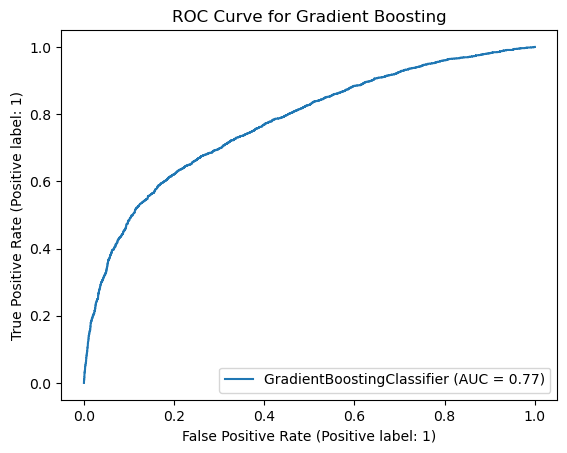

<Figure size 640x480 with 0 Axes>

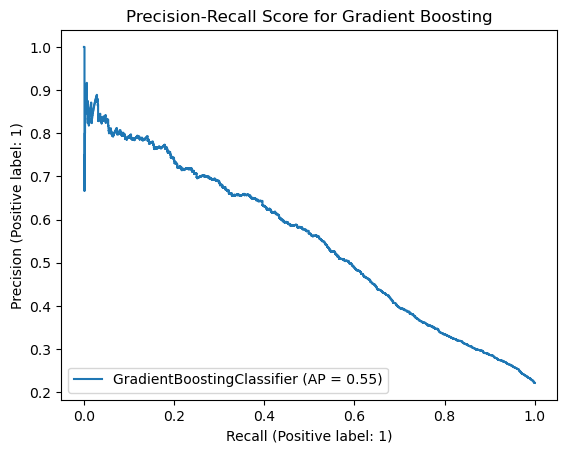

In [36]:
train_model_and_plot("Gradient Boosting",ensemble.GradientBoostingClassifier())

# Gradient Boosting w/ Hidden Layers

We cannot use the function for this because it doesn't have ROC and Precision-Recall. 

In [39]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

#Creating Hidden Layers
model = Sequential()
model.add(Dense(12,input_dim=87,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(12,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
h = model.fit(X_train,Y_train,batch_size=10,epochs=25)

Epoch 1/25
2246/2246 [==============================] - 3s 1ms/step - loss: 0.4775 - accuracy: 0.7980
Epoch 2/25
2246/2246 [==============================] - 2s 1ms/step - loss: 0.4466 - accuracy: 0.8137
Epoch 3/25
2246/2246 [==============================] - 2s 1ms/step - loss: 0.4416 - accuracy: 0.8157
Epoch 4/25
2246/2246 [==============================] - 2s 1ms/step - loss: 0.4388 - accuracy: 0.8188
Epoch 5/25
2246/2246 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8184
Epoch 6/25
2246/2246 [==============================] - 2s 1ms/step - loss: 0.4346 - accuracy: 0.8187
Epoch 7/25
2246/2246 [==============================] - 3s 1ms/step - loss: 0.4357 - accuracy: 0.8198
Epoch 8/25
2246/2246 [==============================] - 2s 1ms/step - loss: 0.4347 - accuracy: 0.8182
Epoch 9/25
2246/2246 [==============================] - 2s 1ms/step - loss: 0.4327 - accuracy: 0.8197
Epoch 10/25
2246/2246 [==============================] - 2s 1ms/step - loss: 0.432

234/234 [==============================] - 0s 770us/step
Accuracy of Gradient Boosting with hidden layers is 0.8153


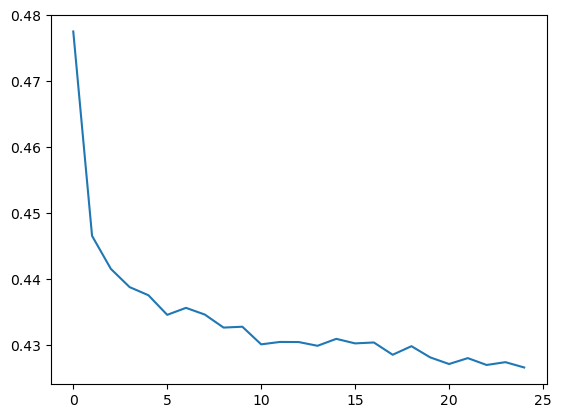

In [40]:
import matplotlib.pyplot as plt
model_name = "Gradient Boosting with hidden layers"
plt.plot(h.history["loss"])
pred = model.predict(X_test)
import numpy as np
pred = np.where(pred>=0.5,1,0)
cm = confusion_matrix(Y_test,pred)
accuracy = round((cm[0,0]+cm[1,1])/(sum(sum(cm))),4)
print(f"Accuracy of {model_name} is {accuracy}")

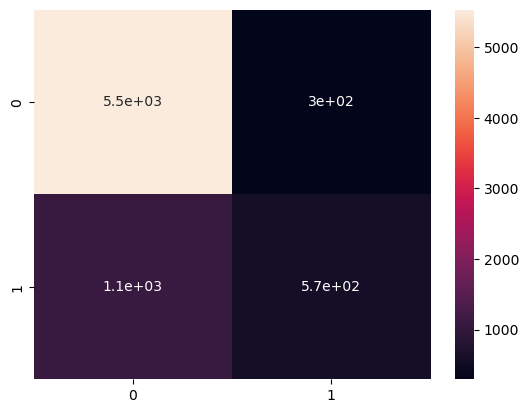

In [41]:
cm
sns.heatmap(cm,annot=True)
accuracy_table.append([model_name,accuracy])

## Neural Networks

[[5538  292]
 [1110  547]]
Accuracy of Neural Network is 0.8127


C:\Users\thepi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

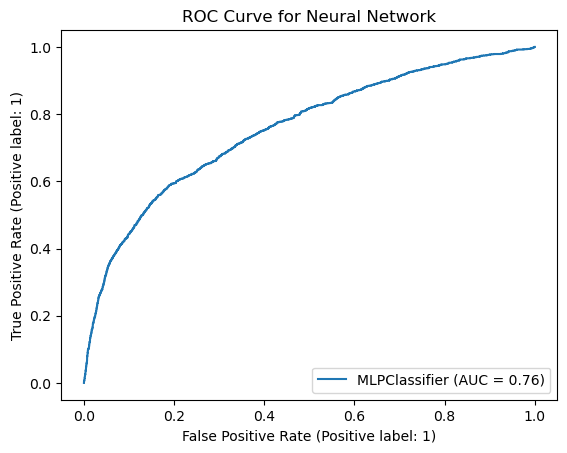

<Figure size 640x480 with 0 Axes>

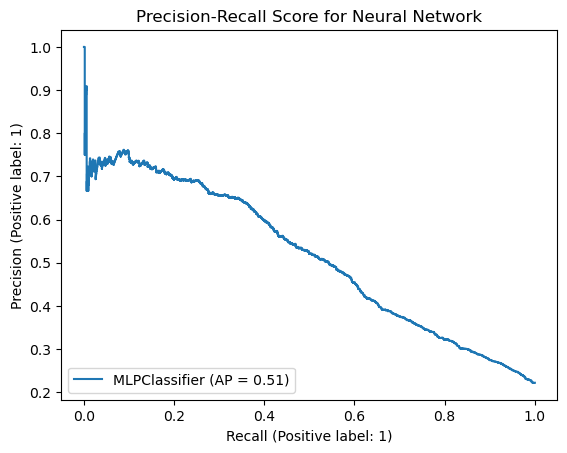

In [44]:
from sklearn import neural_network
train_model_and_plot("Neural Network",neural_network.MLPClassifier(max_iter=100))

# Final results

In [47]:
#sorting table by descending order of accuracy
accuracy_table = sorted(accuracy_table,key = lambda x: float(x[1]),reverse=True) 
a = ["Model Used","Accuracy of Model"]
accuracy_table.insert(0,a)

In [48]:
from tabulate import tabulate
print(tabulate(accuracy_table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════════════════╤═════════════════════╕
│ Model Used                           │   Accuracy of Model │
╞══════════════════════════════════════╪═════════════════════╡
│ Logistic Regression                  │              0.8162 │
├──────────────────────────────────────┼─────────────────────┤
│ Gradient Boosting                    │              0.8155 │
├──────────────────────────────────────┼─────────────────────┤
│ Gradient Boosting with hidden layers │              0.8153 │
├──────────────────────────────────────┼─────────────────────┤
│ Neural Network                       │              0.8127 │
├──────────────────────────────────────┼─────────────────────┤
│ Random Forest                        │              0.8086 │
├──────────────────────────────────────┼─────────────────────┤
│ Neural Network                       │              0.8063 │
├──────────────────────────────────────┼─────────────────────┤
│ Decision Tree                        │              0